In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load datasets
severity_df = pd.read_csv('symptom_severity.csv')
dataset_df = pd.read_csv('dataset.csv')
description_df = pd.read_csv('symptom_Description.csv')
precaution_df = pd.read_csv('symptom_precaution.csv')

In [3]:
dataset_df.head(3)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
null_counts = dataset_df.isnull().sum()
print(null_counts[null_counts > 0])

Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64


In [5]:
# Calculate the percentage of missing values
missing_percentage = (null_counts / len(dataset_df)) * 100
print(missing_percentage[missing_percentage > 0])


Symptom_4      7.073171
Symptom_5     24.512195
Symptom_6     40.365854
Symptom_7     53.902439
Symptom_8     60.487805
Symptom_9     65.609756
Symptom_10    69.268293
Symptom_11    75.731707
Symptom_12    84.878049
Symptom_13    89.756098
Symptom_14    93.780488
Symptom_15    95.121951
Symptom_16    96.097561
Symptom_17    98.536585
dtype: float64


In [6]:
merged_data = pd.merge(dataset_df,description_df , on='Disease', how='left')

In [7]:
final_merged_data = pd.merge(merged_data, precaution_df, on='Disease', how='left')

In [8]:
final_merged_data.head(3)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Description,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths


In [9]:
# # Fill numerical columns with mean
# data['Symptom_4'].fillna(data['Symptom_4'].mean(), inplace=True)

# Fill categorical columns with mode
final_merged_data['Disease'].fillna(final_merged_data['Disease'].mode()[0], inplace=True)

In [10]:
final_merged_data.columns

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17', 'Description', 'Precaution_1',
       'Precaution_2', 'Precaution_3', 'Precaution_4'],
      dtype='object')

In [11]:
final_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Disease       4920 non-null   object
 1   Symptom_1     4920 non-null   object
 2   Symptom_2     4920 non-null   object
 3   Symptom_3     4920 non-null   object
 4   Symptom_4     4572 non-null   object
 5   Symptom_5     3714 non-null   object
 6   Symptom_6     2934 non-null   object
 7   Symptom_7     2268 non-null   object
 8   Symptom_8     1944 non-null   object
 9   Symptom_9     1692 non-null   object
 10  Symptom_10    1512 non-null   object
 11  Symptom_11    1194 non-null   object
 12  Symptom_12    744 non-null    object
 13  Symptom_13    504 non-null    object
 14  Symptom_14    306 non-null    object
 15  Symptom_15    240 non-null    object
 16  Symptom_16    192 non-null    object
 17  Symptom_17    72 non-null     object
 18  Description   4560 non-null   object
 19  Precau

In [12]:
final_merged_data.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Description,Precaution_1,Precaution_2,Precaution_3,Precaution_4
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,...,504,306,240,192,72,4560,4920,4920,4800,4800
unique,41,34,48,54,50,38,32,26,21,22,...,8,4,3,3,1,38,32,34,30,24
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,...,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain,"In humans, fungal infections occur when an inv...",avoid fatty spicy food,exercise,consult doctor,follow up
freq,120,822,870,726,378,348,390,264,276,228,...,72,96,144,72,72,120,360,360,720,720


In [13]:
# Count unique symptoms
unique_symptom_count = final_merged_data['Symptom_1'].unique()
print(f'Total number of unique symptoms: {unique_symptom_count}')


Total number of unique symptoms: ['itching' ' skin_rash' ' continuous_sneezing' ' shivering'
 ' stomach_pain' ' acidity' ' vomiting' ' indigestion' ' muscle_wasting'
 ' patches_in_throat' ' fatigue' ' weight_loss' ' sunken_eyes' ' cough'
 ' headache' ' chest_pain' ' back_pain' ' weakness_in_limbs' ' chills'
 ' joint_pain' ' yellowish_skin' ' constipation'
 ' pain_during_bowel_movements' ' breathlessness' ' cramps' ' weight_gain'
 ' mood_swings' ' neck_pain' ' muscle_weakness' ' stiff_neck'
 ' pus_filled_pimples' ' burning_micturition' ' bladder_discomfort'
 ' high_fever']


In [14]:
# Count unique symptoms
unique_symptom_count = final_merged_data['Symptom_2'].unique()
print(f'Total number of unique symptoms: {unique_symptom_count}')


Total number of unique symptoms: [' skin_rash' ' nodal_skin_eruptions' ' shivering' ' chills' ' acidity'
 ' ulcers_on_tongue' ' vomiting' ' yellowish_skin' ' stomach_pain'
 ' loss_of_appetite' ' indigestion' ' patches_in_throat' ' high_fever'
 ' weight_loss' ' restlessness' ' sunken_eyes' ' dehydration' ' cough'
 ' chest_pain' ' dizziness' ' headache' ' weakness_in_limbs' ' neck_pain'
 ' weakness_of_one_body_side' ' fatigue' ' joint_pain' ' lethargy'
 ' nausea' ' abdominal_pain' ' pain_during_bowel_movements'
 ' pain_in_anal_region' ' breathlessness' ' sweating' ' cramps'
 ' bruising' ' weight_gain' ' cold_hands_and_feets' ' mood_swings'
 ' anxiety' ' knee_pain' ' stiff_neck' ' swelling_joints'
 ' pus_filled_pimples' ' blackheads' ' bladder_discomfort'
 ' foul_smell_of urine' ' skin_peeling' ' blister']


In [15]:
final_merged_data.iloc[:,1:]
final_merged_data.iloc[:, 1:].values.ravel()

array(['itching', ' skin_rash', ' nodal_skin_eruptions', ...,
       'use antibiotics', 'remove scabs with wet compressed cloth',
       'consult doctor'], dtype=object)

In [16]:
# give categorial numerical value

# Create a list to store unique symptoms
unique_symptoms = pd.Series(final_merged_data.iloc[:, 1:].values.ravel()).dropna().unique()

# Create a mapping of symptoms to numerical values
symptom_mapping = {symptom: idx for idx, symptom in enumerate(unique_symptoms)}

print("Symptom Mapping:")
print(symptom_mapping)


Symptom Mapping:
{'itching': 0, ' skin_rash': 1, ' nodal_skin_eruptions': 2, ' dischromic _patches': 3, 'In humans, fungal infections occur when an invading fungus takes over an area of the body and is too much for the immune system to handle. Fungi can live in the air, soil, water, and plants. There are also some fungi that live naturally in the human body. Like many microbes, there are helpful fungi and harmful fungi.': 4, 'bath twice': 5, 'use detol or neem in bathing water': 6, 'keep infected area dry': 7, 'use clean cloths': 8, ' continuous_sneezing': 9, ' shivering': 10, ' chills': 11, ' watering_from_eyes': 12, "An allergy is an immune system response to a foreign substance that's not typically harmful to your body.They can include certain foods, pollen, or pet dander. Your immune system's job is to keep you healthy by fighting harmful pathogens.": 13, 'apply calamine': 14, 'cover area with bandage': 15, 'use ice to compress itching': 16, ' stomach_pain': 17, ' acidity': 18, ' u

In [17]:
# Function to replace symptoms with their mapped values
def replace_symptoms(row):
    for col in row.index:
        if col.startswith('Symptom') or col.startswith('Precaution') or col.startswith('Description'):
            row[col] = symptom_mapping.get(row[col], -1)  # Use -1 for NaN or unknown symptoms
    return row

# Apply the function to each row
data_replaced = final_merged_data.apply(replace_symptoms, axis=1)


In [18]:
print(data_replaced.head())


            Disease  Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  \
0  Fungal infection          0          1          2          3         -1   
1  Fungal infection          1          2          3         -1         -1   
2  Fungal infection          0          2          3         -1         -1   
3  Fungal infection          0          1          3         -1         -1   
4  Fungal infection          0          1          2         -1         -1   

   Symptom_6  Symptom_7  Symptom_8  Symptom_9  ...  Symptom_13  Symptom_14  \
0         -1         -1         -1         -1  ...          -1          -1   
1         -1         -1         -1         -1  ...          -1          -1   
2         -1         -1         -1         -1  ...          -1          -1   
3         -1         -1         -1         -1  ...          -1          -1   
4         -1         -1         -1         -1  ...          -1          -1   

   Symptom_15  Symptom_16  Symptom_17  Description  Precaution

In [19]:
data_replaced.to_csv('updated_dataset.csv', index=False)


In [20]:
data_replaced.head(2)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Description,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Fungal infection,0,1,2,3,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,4,5,6,7,8
1,Fungal infection,1,2,3,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,4,5,6,7,8


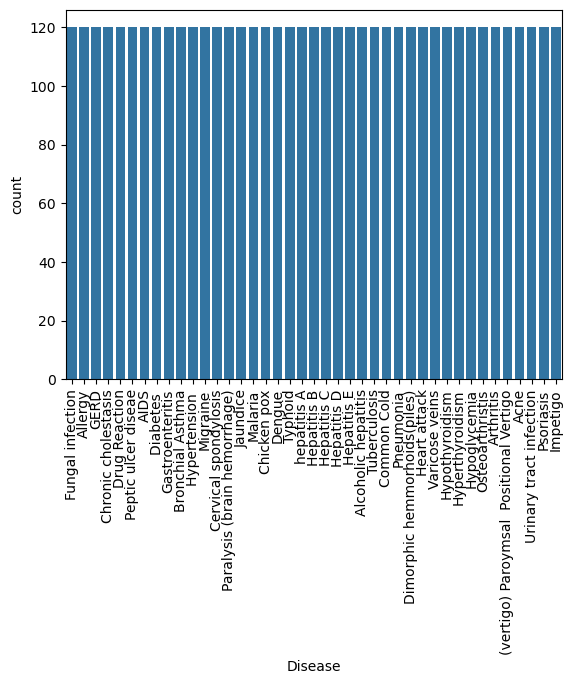

In [21]:
sns.countplot(x='Disease', data=data_replaced)
plt.xticks(rotation=90)
plt.show()

In [22]:
# check the real data
real_data = pd.read_csv('updated_dataset.csv')
real_data.head(4)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Description,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Fungal infection,0,1,2,3,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,4,5,6,7,8
1,Fungal infection,1,2,3,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,4,5,6,7,8
2,Fungal infection,0,2,3,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,4,5,6,7,8
3,Fungal infection,0,1,3,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,4,5,6,7,8


In [23]:
real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Disease       4920 non-null   object
 1   Symptom_1     4920 non-null   int64 
 2   Symptom_2     4920 non-null   int64 
 3   Symptom_3     4920 non-null   int64 
 4   Symptom_4     4920 non-null   int64 
 5   Symptom_5     4920 non-null   int64 
 6   Symptom_6     4920 non-null   int64 
 7   Symptom_7     4920 non-null   int64 
 8   Symptom_8     4920 non-null   int64 
 9   Symptom_9     4920 non-null   int64 
 10  Symptom_10    4920 non-null   int64 
 11  Symptom_11    4920 non-null   int64 
 12  Symptom_12    4920 non-null   int64 
 13  Symptom_13    4920 non-null   int64 
 14  Symptom_14    4920 non-null   int64 
 15  Symptom_15    4920 non-null   int64 
 16  Symptom_16    4920 non-null   int64 
 17  Symptom_17    4920 non-null   int64 
 18  Description   4920 non-null   int64 
 19  Precau

In [24]:
#preprocess the data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [25]:
# split the dataset
x = real_data.drop('Disease',axis=1)
y = real_data['Disease']

In [26]:
x.shape,y.shape

((4920, 22), (4920,))

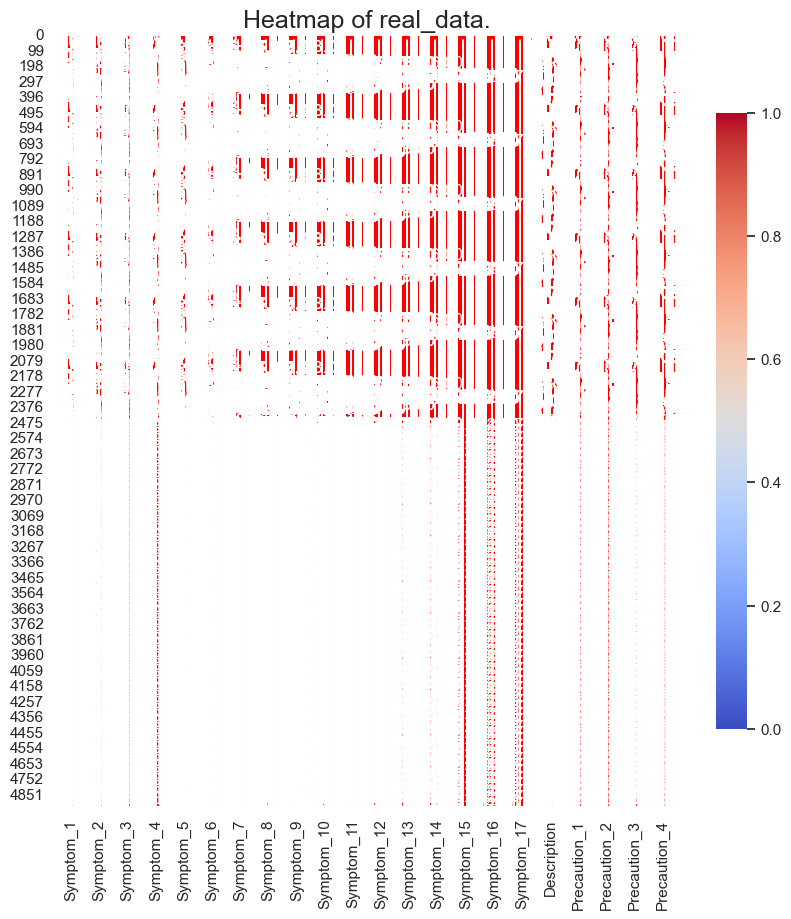

In [27]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(x,
                       annot=True,
                       fmt=".2f",
                       cmap='coolwarm',
                       linewidths=.2,
                       linecolor='red',
                       cbar_kws={"shrink": .8},
                       vmin=0, vmax=1)

plt.title('Heatmap of real_data.', fontsize=18)


# Show the heatmap
plt.show()

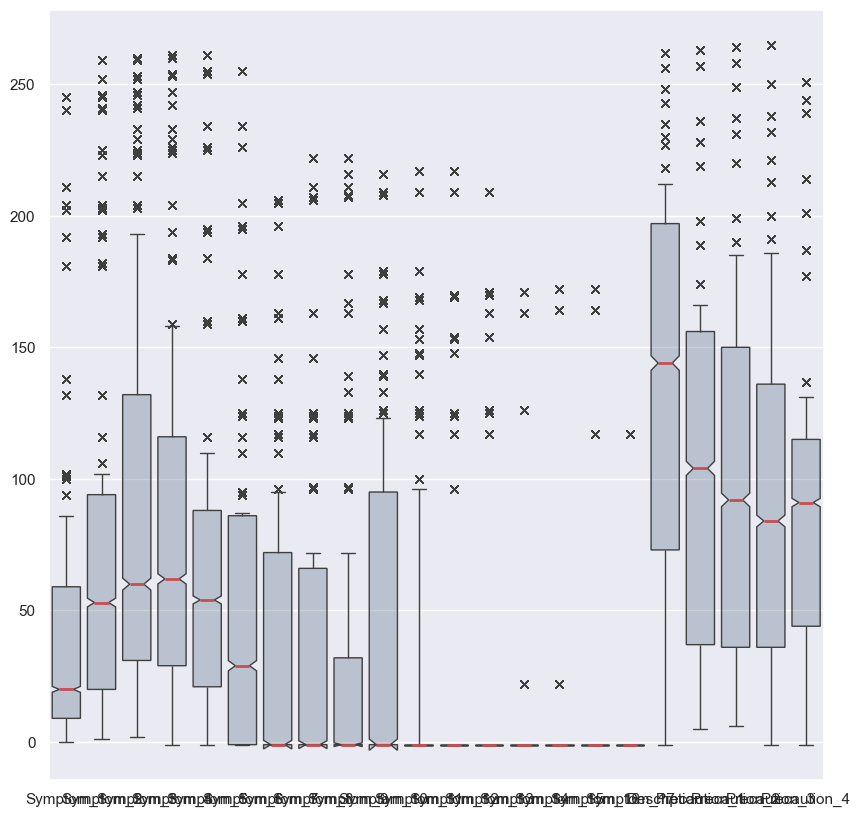

In [28]:
plt.figure(figsize=(10,10))
sns.boxplot(data=real_data,notch=True,showcaps=True,flierprops={'marker':'x'},
            boxprops={'facecolor':(.3,.4,.5,.3)},medianprops={'color':'r','linewidth':2},whis=(0,80))
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [30]:
y_encoded

array([15, 15, 15, ..., 38, 35, 27])

In [31]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=2)


In [32]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [33]:
model = Sequential([
    Dense(512, activation='relu', kernel_regularizer=l1_l2(0.01), input_shape=(x_train.shape[1],)),
    Dropout(0.05),
    Dense(256, activation='relu', kernel_regularizer=l1_l2(0.01)),
    Dropout(0.05),
    Dense(128, activation='relu', kernel_regularizer=l1_l2(0.01)),
    Dropout(0.05),
    Dense(64, activation='relu', kernel_regularizer=l1_l2(0.01)),
    Dropout(0.05),
    Dense(32, activation='relu', kernel_regularizer=l1_l2(0.01)),
    BatchNormalization(),
    # Change this line to match the number of unique classes in your target variable
    Dense(len(np.unique(y_train)), activation='softmax'),
])

In [34]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [35]:
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr =1e-6)

In [36]:
history = model.fit(x_train, y_train, epochs=300, batch_size=32, validation_split=0.2)

Epoch 1/300
99/99 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.1165 - loss: 71.7830 - val_accuracy: 0.1688 - val_loss: 22.5822
Epoch 2/300
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5371 - loss: 17.0807 - val_accuracy: 0.0305 - val_loss: 10.9718
Epoch 3/300
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.8406 - loss: 7.5285 - val_accuracy: 0.0266 - val_loss: 7.5728
Epoch 4/300
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9095 - loss: 4.5017 - val_accuracy: 0.2043 - val_loss: 5.9581
Epoch 5/300
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9179 - loss: 3.2433 - val_accuracy: 0.4480 - val_loss: 4.9753
Epoch 6/300
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9307 - loss: 2.5753 - val_accuracy: 0.8629 - val_loss: 4.0648
Epoch 7/300
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9430 - loss: 2.1553 - val_accuracy: 0.9442 - val_loss: 3.2403
Epoch 8/300
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9367 - loss: 1.9278 - val_accurac

In [37]:
loss = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')

31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9956 - loss: 0.7265
Test Loss: [0.7297958731651306, 0.9939024448394775]


In [38]:
# Make predictions on test data
predictions = model.predict(x_test)

# Convert predictions back to original labels if needed
predicted_classes = label_encoder.inverse_transform(predictions.argmax(axis=1))


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step


In [39]:
predicted_classes

array(['Migraine', 'Hepatitis D', 'Chicken pox', 'Arthritis',
       'Tuberculosis', 'Hepatitis C', 'Cervical spondylosis', 'Pneumonia',
       'Hyperthyroidism', 'Drug Reaction', 'Hepatitis C', 'Tuberculosis',
       'Acne', 'Jaundice', 'Hepatitis E', 'Chicken pox',
       'Paralysis (brain hemorrhage)', 'Gastroenteritis',
       'Bronchial Asthma', 'Gastroenteritis',
       'Paralysis (brain hemorrhage)', 'Alcoholic hepatitis',
       'Cervical spondylosis', 'Hepatitis E', 'Hepatitis C',
       'Hypoglycemia', 'Diabetes ', 'hepatitis A', 'Jaundice',
       'Paralysis (brain hemorrhage)', 'Chronic cholestasis',
       'hepatitis A', 'Typhoid', 'Malaria', 'Hepatitis C', 'Allergy',
       'Hypothyroidism', 'Hepatitis B', 'Migraine', 'Diabetes ',
       'hepatitis A', 'Hyperthyroidism', 'Psoriasis',
       'Paralysis (brain hemorrhage)', 'Migraine', 'Gastroenteritis',
       'Urinary tract infection', 'AIDS', 'Pneumonia', 'Chicken pox',
       'Dimorphic hemmorhoids(piles)', 'Malaria',
 

In [40]:
scaler = StandardScaler()


In [41]:
scaler = StandardScaler()
scaler.fit(x_train) # Fit the scaler to your training data

def predict_disease(user_symptoms):
    # Create a DataFrame with all columns, filling missing with -1
    symptoms_df = pd.DataFrame([[*user_symptoms, *([-1] * (len(x.columns) - len(user_symptoms)))]],
                                 columns=x.columns)

    # Standardize input symptoms using previously fitted scaler
    standardized_symptoms = scaler.transform(symptoms_df)

    # Make predictions using the trained model
    predictions = model.predict(standardized_symptoms)

    # Get predicted class index and convert it back to disease name
    predicted_class_index = np.argmax(predictions)

    # Encode label (assuming you have a label encoder saved during training)
    label_encoder = LabelEncoder()
    label_encoder.fit(real_data['Disease'])  # Fit on existing labels
    predicted_disease = label_encoder.inverse_transform([predicted_class_index])

    return predicted_disease[0]

# Example user input (replace with actual symptom values)
user_input_symptoms = [0, 1, 2, -1, -1, -1, -1, -1, -1, -1]  # Adjust according to your symptom mapping

predicted_disease = predict_disease(user_input_symptoms)
print(f'Predicted Disease: {predicted_disease}')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step
Predicted Disease: Fungal infection


In [42]:
#Symptom Mapping:

# {'itching': 0, ' skin_rash': 1, ' nodal_skin_eruptions': 2, ' dischromic _patches': 3, 'In humans, fungal infections occur when an invading fungus takes over an area of the body and is too much for the immune system to handle. Fungi can live in the air, soil, water, and plants. There are also some fungi that live naturally in the human body. Like many microbes, there are helpful fungi and harmful fungi.': 4, 'bath twice': 5, 'use detol or neem in bathing water': 6, 'keep infected area dry': 7, 'use clean cloths': 8, ' continuous_sneezing': 9, ' shivering': 10, ' chills': 11, ' watering_from_eyes': 12, "An allergy is an immune system response to a foreign substance that's not typically harmful to your body.They can include certain foods, pollen, or pet dander. Your immune system's job is to keep you healthy by fighting harmful pathogens.": 13, 'apply calamine': 14, 'cover area with bandage': 15, 'use ice to compress itching': 16, ' stomach_pain': 17, ' acidity': 18, ' ulcers_on_tongue': 19, ' vomiting': 20, ' cough': 21, ' chest_pain': 22, 'Gastroesophageal reflux disease, or GERD, is a digestive disorder that affects the lower esophageal sphincter (LES), the ring of muscle between the esophagus and stomach. Many people, including pregnant women, suffer from heartburn or acid indigestion caused by GERD.': 23, 'avoid fatty spicy food': 24, 'avoid lying down after eating': 25, 'maintain healthy weight': 26, 'exercise': 27, ' yellowish_skin': 28, ' nausea': 29, ' loss_of_appetite': 30, ' abdominal_pain': 31, ' yellowing_of_eyes': 32, 'Chronic cholestatic diseases, whether occurring in infancy, childhood or adulthood, are characterized by defective bile acid transport from the liver to the intestine, which is caused by primary damage to the biliary epithelium in most cases': 33, 'cold baths': 34, 'anti itch medicine': 35, 'consult doctor': 36, 'eat healthy': 37, ' burning_micturition': 38, ' spotting_ urination': 39, 'An adverse drug reaction (ADR) is an injury caused by taking medication. ADRs may occur following a single dose or prolonged administration of a drug or result from the combination of two or more drugs.': 40, 'stop irritation': 41, 'consult nearest hospital': 42, 'stop taking drug': 43, 'follow up': 44, ' passage_of_gases': 45, ' internal_itching': 46, 'Peptic ulcer disease (PUD) is a break in the inner lining of the stomach, the first part of the small intestine, or sometimes the lower esophagus. An ulcer in the stomach is called a gastric ulcer, while one in the first part of the intestines is a duodenal ulcer.': 47, 'consume probiotic food': 48, 'eliminate milk': 49, 'limit alcohol': 50, ' indigestion': 51, ' muscle_wasting': 52, ' patches_in_throat': 53, ' high_fever': 54, ' extra_marital_contacts': 55, "Acquired immunodeficiency syndrome (AIDS) is a chronic, potentially life-threatening condition caused by the human immunodeficiency virus (HIV). By damaging your immune system, HIV interferes with your body's ability to fight infection and disease.": 56, 'avoid open cuts': 57, 'wear ppe if possible': 58, ' fatigue': 59, ' weight_loss': 60, ' restlessness': 61, ' lethargy': 62, ' irregular_sugar_level': 63, ' blurred_and_distorted_vision': 64, ' obesity': 65, ' excessive_hunger': 66, ' increased_appetite': 67, ' polyuria': 68, 'have balanced diet': 69, ' sunken_eyes': 70, ' dehydration': 71, ' diarrhoea': 72, 'Gastroenteritis is an inflammation of the digestive tract, particularly the stomach, and large and small intestines. Viral and bacterial gastroenteritis are intestinal infections associated with symptoms of diarrhea , abdominal cramps, nausea , and vomiting .': 73, 'stop eating solid food for while': 74, 'try taking small sips of water': 75, 'rest': 76, 'ease back into eating': 77, ' breathlessness': 78, ' family_history': 79, ' mucoid_sputum': 80, 'Bronchial asthma is a medical condition which causes the airway path of the lungs to swell and narrow. Due to this swelling, the air path produces excess mucus making it hard to breathe, which results in coughing, short breath, and wheezing. The disease is chronic and interferes with daily working.': 81, 'switch to loose cloothing': 82, 'take deep breaths': 83, 'get away from trigger': 84, 'seek help': 85, ' headache': 86, ' dizziness': 87, ' loss_of_balance': 88, ' lack_of_concentration': 89, 'meditation': 90, 'salt baths': 91, 'reduce stress': 92, 'get proper sleep': 93, ' stiff_neck': 94, ' depression': 95, ' irritability': 96, ' visual_disturbances': 97, "A migraine can cause severe throbbing pain or a pulsing sensation, usually on one side of the head. It's often accompanied by nausea, vomiting, and extreme sensitivity to light and sound. Migraine attacks can last for hours to days, and the pain can be so severe that it interferes with your daily activities.": 98, 'use poloroid glasses in sun': 99, ' back_pain': 100, ' weakness_in_limbs': 101, ' neck_pain': 102, 'Cervical spondylosis is a general term for age-related wear and tear affecting the spinal disks in your neck. As the disks dehydrate and shrink, signs of osteoarthritis develop, including bony projections along the edges of bones (bone spurs).': 103, 'use heating pad or cold pack': 104, 'take otc pain reliver': 105, ' weakness_of_one_body_side': 106, ' altered_sensorium': 107, 'Intracerebral hemorrhage (ICH) is when blood suddenly bursts into brain tissue, causing damage to your brain. Symptoms usually appear suddenly during ICH. They include headache, weakness, confusion, and paralysis, particularly on one side of your body.': 108, 'massage': 109, ' dark_urine': 110, 'Yellow staining of the skin and sclerae (the whites of the eyes) by abnormally high blood levels of the bile pigment bilirubin. The yellowing extends to other tissues and body fluids. Jaundice was once called the "morbus regius" (the regal disease) in the belief that only the touch of a king could cure it': 111, 'drink plenty of water': 112, 'consume milk thistle': 113, 'eat fruits and high fiberous food': 114, 'medication': 115, ' sweating': 116, ' muscle_pain': 117, 'An infectious disease caused by protozoan parasites from the Plasmodium family that can be transmitted by the bite of the Anopheles mosquito or by a contaminated needle or transfusion. Falciparum malaria is the most deadly type.': 118, 'Consult nearest hospital': 119, 'avoid oily food': 120, 'avoid non veg food': 121, 'keep mosquitos out': 122, ' mild_fever': 123, ' swelled_lymph_nodes': 124, ' malaise': 125, ' red_spots_over_body': 126, 'Chickenpox is a highly contagious disease caused by the varicella-zoster virus (VZV). It can cause an itchy, blister-like rash. The rash first appears on the chest, back, and face, and then spreads over the entire body, causing between 250 and 500 itchy blisters.': 127, 'use neem in bathing ': 128, 'consume neem leaves': 129, 'take vaccine': 130, 'avoid public places': 131, ' joint_pain': 132, ' pain_behind_the_eyes': 133, 'an acute infectious disease caused by a flavivirus (species Dengue virus of the genus Flavivirus), transmitted by aedes mosquitoes, and characterized by headache, severe joint pain, and a rash. — called also breakbone fever, dengue fever.': 134, 'drink papaya leaf juice': 135, 'keep mosquitos away': 136, 'keep hydrated': 137, ' constipation': 138, ' toxic_look_(typhos)': 139, ' belly_pain': 140, 'An acute illness characterized by fever caused by infection with the bacterium Salmonella typhi. Typhoid fever has an insidious onset, with fever, headache, constipation, malaise, chills, and muscle pain. Diarrhea is uncommon, and vomiting is not usually severe.': 141, 'eat high calorie vegitables': 142, 'antiboitic therapy': 143, "Hepatitis A is a highly contagious liver infection caused by the hepatitis A virus. The virus is one of several types of hepatitis viruses that cause inflammation and affect your liver's ability to function.": 144, 'wash hands through': 145, ' yellow_urine': 146, ' receiving_blood_transfusion': 147, ' receiving_unsterile_injections': 148, "Hepatitis B is an infection of your liver. It can cause scarring of the organ, liver failure, and cancer. It can be fatal if it isn't treated. It's spread when people come in contact with the blood, open sores, or body fluids of someone who has the hepatitis B virus.": 149, 'vaccination': 150, 'Inflammation of the liver due to the hepatitis C virus (HCV), which is usually spread via blood transfusion (rare), hemodialysis, and needle sticks. The damage hepatitis C does to the liver can lead to cirrhosis and its complications as well as cancer.': 151, 'Hepatitis D, also known as the hepatitis delta virus, is an infection that causes the liver to become inflamed. This swelling can impair liver function and cause long-term liver problems, including liver scarring and cancer. The condition is caused by the hepatitis D virus (HDV).': 152, ' coma': 153, ' stomach_bleeding': 154, 'A rare form of liver inflammation caused by infection with the hepatitis E virus (HEV). It is transmitted via food or drink handled by an infected person or through infected water supplies in areas where fecal matter may get into the water. Hepatitis E does not cause chronic liver disease.': 155, 'stop alcohol consumption': 156, ' acute_liver_failure': 157, ' swelling_of_stomach': 158, ' distention_of_abdomen': 159, ' history_of_alcohol_consumption': 160, ' fluid_overload': 161, "Alcoholic hepatitis is a diseased, inflammatory condition of the liver caused by heavy alcohol consumption over an extended period of time. It's also aggravated by binge drinking and ongoing alcohol use. If you develop this condition, you must stop drinking alcohol": 162, ' phlegm': 163, ' blood_in_sputum': 164, 'Tuberculosis (TB) is an infectious disease usually caused by Mycobacterium tuberculosis (MTB) bacteria. Tuberculosis generally affects the lungs, but can also affect other parts of the body. Most infections show no symptoms, in which case it is known as latent tuberculosis.': 165, 'cover mouth': 166, ' throat_irritation': 167, ' redness_of_eyes': 168, ' sinus_pressure': 169, ' runny_nose': 170, ' congestion': 171, ' loss_of_smell': 172, "The common cold is a viral infection of your nose and throat (upper respiratory tract). It's usually harmless, although it might not feel that way. Many types of viruses can cause a common cold.": 173, 'drink vitamin c rich drinks': 174, 'take vapour': 175, 'avoid cold food': 176, 'keep fever in check': 177, ' fast_heart_rate': 178, ' rusty_sputum': 179, 'Pneumonia is an infection in one or both lungs. Bacteria, viruses, and fungi cause it. The infection causes inflammation in the air sacs in your lungs, which are called alveoli. The alveoli fill with fluid or pus, making it difficult to breathe.': 180, ' pain_during_bowel_movements': 181, ' pain_in_anal_region': 182, ' bloody_stool': 183, ' irritation_in_anus': 184, 'consume witch hazel': 185, 'warm bath with epsom salt': 186, 'consume alovera juice': 187, 'The death of heart muscle due to the loss of blood supply. The loss of blood supply is usually caused by a complete blockage of a coronary artery, one of the arteries that supplies blood to the heart muscle.': 188, 'call ambulance': 189, 'chew or swallow asprin': 190, 'keep calm': 191, ' cramps': 192, ' bruising': 193, ' swollen_legs': 194, ' swollen_blood_vessels': 195, ' prominent_veins_on_calf': 196, 'A vein that has enlarged and twisted, often appearing as a bulging, blue blood vessel that is clearly visible through the skin. Varicose veins are most common in older adults, particularly women, and occur especially on the legs.': 197, 'lie down flat and raise the leg high': 198, 'use oinments': 199, 'use vein compression': 200, 'dont stand still for long': 201, ' weight_gain': 202, ' cold_hands_and_feets': 203, ' mood_swings': 204, ' puffy_face_and_eyes': 205, ' enlarged_thyroid': 206, ' brittle_nails': 207, ' swollen_extremeties': 208, ' abnormal_menstruation': 209, 'Hypothyroidism, also called underactive thyroid or low thyroid, is a disorder of the endocrine system in which the thyroid gland does not produce enough thyroid hormone.': 210, ' muscle_weakness': 211, "Hyperthyroidism (overactive thyroid) occurs when your thyroid gland produces too much of the hormone thyroxine. Hyperthyroidism can accelerate your body's metabolism, causing unintentional weight loss and a rapid or irregular heartbeat.": 212, 'use lemon balm': 213, 'take radioactive iodine treatment': 214, ' anxiety': 215, ' slurred_speech': 216, ' palpitations': 217, " Hypoglycemia is a condition in which your blood sugar (glucose) level is lower than normal. Glucose is your body's main energy source. Hypoglycemia is often related to diabetes treatment. But other drugs and a variety of conditions — many rare — can cause low blood sugar in people who don't have diabetes.": 218, 'lie down on side': 219, 'check in pulse': 220, 'drink sugary drinks': 221, ' drying_and_tingling_lips': 222, ' knee_pain': 223, ' hip_joint_pain': 224, ' swelling_joints': 225, ' painful_walking': 226, 'Osteoarthritis is the most common form of arthritis, affecting millions of people worldwide. It occurs when the protective cartilage that cushions the ends of your bones wears down over time.': 227, 'acetaminophen': 228, ' movement_stiffness': 229, 'Arthritis is the swelling and tenderness of one or more of your joints. The main symptoms of arthritis are joint pain and stiffness, which typically worsen with age. The most common types of arthritis are osteoarthritis and rheumatoid arthritis.': 230, 'use hot and cold therapy': 231, 'try acupuncture': 232, ' spinning_movements': 233, ' unsteadiness': 234, "Benign paroxysmal positional vertigo (BPPV) is one of the most common causes of vertigo — the sudden sensation that you're spinning or that the inside of your head is spinning. Benign paroxysmal positional vertigo causes brief episodes of mild to intense dizziness.": 235, 'lie down': 236, 'avoid sudden change in body': 237, 'avoid abrupt head movment': 238, 'relax': 239, ' pus_filled_pimples': 240, ' blackheads': 241, ' scurring': 242, 'Acne vulgaris is the formation of comedones, papules, pustules, nodules, and/or cysts as a result of obstruction and inflammation of pilosebaceous units (hair follicles and their accompanying sebaceous gland). Acne develops on the face and upper trunk. It most often affects adolescents.': 243, 'avoid too many products': 244, ' bladder_discomfort': 245, ' foul_smell_of urine': 246, ' continuous_feel_of_urine': 247, 'Urinary tract infection: An infection of the kidney, ureter, bladder, or urethra. Abbreviated UTI. Not everyone with a UTI has symptoms, but common symptoms include a frequent urge to urinate and pain or burning when urinating.': 248, 'increase vitamin c intake': 249, 'drink cranberry juice': 250, 'take probiotics': 251, ' skin_peeling': 252, ' silver_like_dusting': 253, ' small_dents_in_nails': 254, ' inflammatory_nails': 255, "Psoriasis is a common skin disorder that forms thick, red, bumpy patches covered with silvery scales. They can pop up anywhere, but most appear on the scalp, elbows, knees, and lower back. Psoriasis can't be passed from person to person. It does sometimes happen in members of the same family.": 256, 'wash hands with warm soapy water': 257, 'stop bleeding using pressure': 258, ' blister': 259, ' red_sore_around_nose': 260, ' yellow_crust_ooze': 261, "Impetigo (im-puh-TIE-go) is a common and highly contagious skin infection that mainly affects infants and children. Impetigo usually appears as red sores on the face, especially around a child's nose and mouth, and on hands and feet. The sores burst and develop honey-colored crusts.": 262, 'soak affected area in warm water': 263, 'use antibiotics': 264, 'remove scabs with wet compressed cloth': 265}



In [43]:
#save the model

model.save('disease_prediction_model.h5')
print("Model saved as 'disease_prediction_model.h5'")

Model saved as 'disease_prediction_model.h5'


In [44]:
precautions = [
    "Bath twice", "Use Dettol or neem in bathing water", "Keep infected area dry", "Use clean clothes", 
    "Apply calamine", "Cover area with a bandage", "Use ice to compress itching", "Avoid fatty and spicy food", 
    "Avoid lying down after eating", "Maintain a healthy weight", "Exercise", "Take cold baths", "Use anti-itch medicine", 
    "Consult a doctor", "Eat healthy", "Stop irritation", "Consult the nearest hospital", "Stop taking the drug", 
    "Follow up", "Consume probiotic food", "Eliminate milk", "Limit alcohol", "Have a balanced diet", 
    "Stop eating solid food for a while", "Try taking small sips of water", "Rest", "Ease back into eating", 
    "Switch to loose clothing", "Take deep breaths", "Get away from triggers", "Seek help", "Meditate", 
    "Take salt baths", "Reduce stress", "Get proper sleep", "Use Polaroid glasses in the sun", 
    "Use a heating pad or cold pack", "Take OTC pain relievers", "Massage", "Drink plenty of water", 
    "Consume milk thistle", "Eat fruits and high-fiber foods", "Take medication", "Avoid oily food", "Avoid non-veg food", 
    "Keep mosquitoes out", "Use neem in bathing water", "Consume neem leaves", "Take the vaccine", "Avoid public places", 
    "Drink papaya leaf juice", "Stay hydrated", "Eat high-calorie vegetables", "Take antibiotic therapy", 
    "Wash hands thoroughly", "Get vaccinated", "Stop alcohol consumption", "Call an ambulance", "Chew or swallow aspirin", 
    "Keep calm", "Lie down flat and raise the legs high", "Use ointments", "Use vein compression", 
    "Don't stand still for long", "Use lemon balm", "Take radioactive iodine treatment", "Lie down on the side", 
    "Check pulse", "Drink sugary drinks", "Try acupuncture", "Use hot and cold therapy", "Lie down", 
    "Avoid sudden changes in body movements", "Avoid abrupt head movements", "Relax"
]

In [45]:
skin_symptoms = [
    "Itching", "Skin rash", "Nodal skin eruptions", "Dischromic patches", "Red spots over body", "Pus filled pimples", 
    "Blackheads", "Scarring"
]

respiratory_symptoms = [
    "Continuous sneezing", "Cough", "Chest pain", "Breathlessness", "Mucoid sputum", "Blood in sputum", 
    "Throat irritation", "Sinus pressure", "Runny nose", "Congestion", "Loss of smell"
]

digestive_symptoms = [
    "Stomach pain", "Acidity", "Ulcers on tongue", "Vomiting", "Abdominal pain", "Indigestion", "Diarrhea", 
    "Constipation", "Pain during bowel movements", "Pain in anal region", "Bloody stool", "Irritation in anus"
]

neurological_symptoms = [
    "Headache", "Dizziness", "Loss of balance", "Lack of concentration", "Stiff neck", "Depression", "Irritability", 
    "Visual disturbances", "Altered sensorium", "Slurred speech", "Spinning movements", "Unsteadiness"
]

musculoskeletal_symptoms = [
    "Muscle wasting", "Back pain", "Weakness in limbs", "Neck pain", "Muscle pain", "Joint pain", "Knee pain", 
    "Hip joint pain", "Swelling joints", "Painful walking", "Movement stiffness"
]

cardiovascular_symptoms = [
    "Fast heart rate", "Rusty sputum", "Palpitations", "Sweating", "Cold hands and feet", "Swollen blood vessels", 
    "Prominent veins on calf"
]

urinary_symptoms = [
    "Burning micturition", "Spotting urination", "Dark urine", "Yellow urine"
]

vision_symptoms = [
    "Blurred and distorted vision", "Redness of eyes"
]

general_symptoms = [
    "High fever", "Fatigue", "Weight loss", "Restlessness", "Lethargy", "Mood swings", "Mild fever", "Malaise"
]

hormonal_symptoms = [
    "Obesity", "Excessive hunger", "Increased appetite", "Polyuria", "Irregular sugar level", "Enlarged thyroid", 
    "Puffy face and eyes", "Brittle nails", "Swollen extremities", "Abnormal menstruation"
]

In [46]:
symptoms = {
    0: "itching", 1: "skin_rash", 2: "nodal_skin_eruptions", 3: "dischromic_patches", 
    4: "continuous_sneezing", 5: "shivering", 6: "chills", 7: "watering_from_eyes", 
    8: "stomach_pain", 9: "acidity", 10: "ulcers_on_tongue", 11: "vomiting", 12: "cough", 13: "chest_pain",
    14: "yellowish_skin", 15: "nausea", 16: "loss_of_appetite", 17: "abdominal_pain", 18: "yellowing_of_eyes",
    19: "burning_micturition", 20: "spotting_urination", 21: "passage_of_gases", 22: "internal_itching",
    23: "indigestion", 24: "muscle_wasting", 25: "patches_in_throat", 26: "high_fever", 27: "extra_marital_contacts",
    28: "fatigue", 29: "weight_loss", 30: "restlessness", 31: "lethargy", 32: "irregular_sugar_level",
    33: "blurred_and_distorted_vision", 34: "obesity", 35: "excessive_hunger", 36: "increased_appetite",
    37: "polyuria", 38: "sunken_eyes", 39: "dehydration", 40: "diarrhoea", 41: "breathlessness", 42: "family_history",
    43: "mucoid_sputum", 44: "headache", 45: "dizziness", 46: "loss_of_balance", 47: "lack_of_concentration",
    48: "stiff_neck", 49: "depression", 50: "irritability", 51: "visual_disturbances", 52: "back_pain",
    53: "weakness_in_limbs", 54: "neck_pain", 55: "weakness_of_one_body_side", 56: "altered_sensorium",
    57: "dark_urine", 58: "sweating", 59: "muscle_pain", 60: "mild_fever", 61: "swelled_lymph_nodes", 62: "malaise",
    63: "red_spots_over_body", 64: "joint_pain", 65: "pain_behind_the_eyes", 66: "constipation",
    67: "toxic_look_(typhos)", 68: "belly_pain", 69: "yellow_urine", 70: "receiving_blood_transfusion",
    71: "receiving_unsterile_injections", 72: "coma", 73: "stomach_bleeding", 74: "acute_liver_failure",
    75: "swelling_of_stomach", 76: "distention_of_abdomen", 77: "history_of_alcohol_consumption",
    78: "fluid_overload", 79: "phlegm", 80: "blood_in_sputum", 81: "throat_irritation", 82: "redness_of_eyes",
    83: "sinus_pressure", 84: "runny_nose", 85: "congestion", 86: "loss_of_smell", 87: "fast_heart_rate",
    88: "rusty_sputum", 89: "pain_during_bowel_movements", 90: "pain_in_anal_region", 91: "bloody_stool",
    92: "irritation_in_anus", 93: "cramps", 94: "bruising", 95: "swollen_legs", 96: "swollen_blood_vessels",
    97: "prominent_veins_on_calf", 98: "weight_gain", 99: "cold_hands_and_feets", 100: "mood_swings",
    101: "puffy_face_and_eyes", 102: "enlarged_thyroid", 103: "brittle_nails", 104: "swollen_extremeties",
    105: "abnormal_menstruation", 106: "muscle_weakness", 107: "anxiety", 108: "slurred_speech", 109: "palpitations",
    110: "drying_and_tingling_lips", 111: "knee_pain", 112: "hip_joint_pain", 113: "swelling_joints",
    114: "painful_walking", 115: "movement_stiffness", 116: "spinning_movements", 117: "unsteadiness",
    118: "pus_filled_pimples", 119: "blackheads", 120: "scurring"
}


In [47]:
import pandas as pd

# Load both datasets
dataset_df = pd.read_csv('dataset.csv')
updated_dataset_df = pd.read_csv('updated_dataset.csv')

# Compare column names
print("Columns in dataset.csv:")
print(dataset_df.columns.tolist())
print("\nColumns in updated_dataset.csv:")
print(updated_dataset_df.columns.tolist())

# Check if columns match
if set(dataset_df.columns) == set(updated_dataset_df.columns):
    print("\nColumn names match!")
else:
    print("\nColumn names differ!")

# Compare symptom columns specifically (assuming Symptom_1 to Symptom_17)
symptom_cols = [col for col in dataset_df.columns if 'Symptom_' in col]
updated_symptom_cols = [col for col in updated_dataset_df.columns if 'Symptom_' in col]
print("\nSymptom columns in dataset.csv:", symptom_cols)
print("Symptom columns in updated_dataset.csv:", updated_symptom_cols)

# Check a few rows to ensure data structure is similar
print("\nSample from dataset.csv:")
print(dataset_df.head())
print("\nSample from updated_dataset.csv:")
print(updated_dataset_df.head())

Columns in dataset.csv:
['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17']

Columns in updated_dataset.csv:
['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17', 'Description', 'Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']

Column names differ!

Symptom columns in dataset.csv: ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17']
Symptom columns in updated_dataset.csv: ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Sym

In [48]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Define the 121 symptoms from the notebook
symptoms = [
    "itching", "skin_rash", "nodal_skin_eruptions", "dischromic_patches", "continuous_sneezing", "shivering",
    "chills", "watering_from_eyes", "stomach_pain", "acidity", "ulcers_on_tongue", "vomiting", "cough",
    "chest_pain", "yellowish_skin", "nausea", "loss_of_appetite", "abdominal_pain", "yellowing_of_eyes",
    "burning_micturition", "spotting_urination", "passage_of_gases", "internal_itching", "indigestion",
    "muscle_wasting", "patches_in_throat", "high_fever", "extra_marital_contacts", "fatigue", "weight_loss",
    "restlessness", "lethargy", "irregular_sugar_level", "blurred_and_distorted_vision", "obesity",
    "excessive_hunger", "increased_appetite", "polyuria", "sunken_eyes", "dehydration", "diarrhoea",
    "breathlessness", "family_history", "mucoid_sputum", "headache", "dizziness", "loss_of_balance",
    "lack_of_concentration", "stiff_neck", "depression", "irritability", "visual_disturbances", "back_pain",
    "weakness_in_limbs", "neck_pain", "weakness_of_one_body_side", "altered_sensorium", "dark_urine",
    "sweating", "muscle_pain", "mild_fever", "swelled_lymph_nodes", "malaise", "red_spots_over_body",
    "joint_pain", "pain_behind_the_eyes", "constipation", "toxic_look_(typhos)", "belly_pain", "yellow_urine",
    "receiving_blood_transfusion", "receiving_unsterile_injections", "coma", "stomach_bleeding",
    "acute_liver_failure", "swelling_of_stomach", "distention_of_abdomen", "history_of_alcohol_consumption",
    "fluid_overload", "phlegm", "blood_in_sputum", "throat_irritation", "redness_of_eyes", "sinus_pressure",
    "runny_nose", "congestion", "loss_of_smell", "fast_heart_rate", "rusty_sputum", "pain_during_bowel_movements",
    "pain_in_anal_region", "bloody_stool", "irritation_in_anus", "cramps", "bruising", "swollen_legs",
    "swollen_blood_vessels", "prominent_veins_on_calf", "weight_gain", "cold_hands_and_feets", "mood_swings",
    "puffy_face_and_eyes", "enlarged_thyroid", "brittle_nails", "swollen_extremeties", "abnormal_menstruation",
    "muscle_weakness", "anxiety", "slurred_speech", "palpitations", "drying_and_tingling_lips", "knee_pain",
    "hip_joint_pain", "swelling_joints", "painful_walking", "movement_stiffness", "spinning_movements",
    "unsteadiness", "pus_filled_pimples", "blackheads", "scurring"
]

data = pd.read_csv('dataset.csv')


def preprocess_to_binary_matrix(df, symptom_list):
    X = np.zeros((len(df), len(symptom_list)))
    for idx, row in df.iterrows():
        for col in [f'Symptom_{i}' for i in range(1, 18)]:  
            symptom = row[col]
            if pd.notna(symptom):  
                symptom = symptom.strip()
                if symptom in symptom_list:
                    X[idx, symptom_list.index(symptom)] = 1
    return X

X = preprocess_to_binary_matrix(data, symptoms)


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Disease'])

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Number of unique diseases: {len(label_encoder.classes_)}")

Training set shape: (3936, 121)
Validation set shape: (492, 121)
Test set shape: (492, 121)
Number of unique diseases: 41


Epoch 1/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.1673 - loss: 5.3011 - val_accuracy: 0.9472 - val_loss: 2.4733
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6994 - loss: 2.7532 - val_accuracy: 0.9898 - val_loss: 1.4600
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8638 - loss: 1.8296 - val_accuracy: 0.9898 - val_loss: 1.1296
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9066 - loss: 1.4545 - val_accuracy: 0.9898 - val_loss: 0.9314
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9302 - loss: 1.2035 - val_accuracy: 0.9898 - val_loss: 0.7860
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9460 - loss: 1.0483 - val_accuracy: 0.9959 - val_loss: 0.6866
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9442 - loss: 0.9601 - val_accuracy: 0.9959 - val_loss: 0.6246
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9470 - loss: 0.8683 - val_acc

Test Accuracy: 99.80%
Model saved as 'model2.h5'


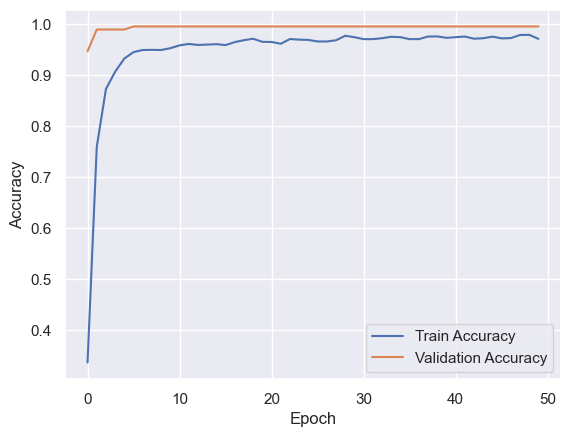

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_dim=121, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer: number of diseases
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Save the model
model.save('model2.h5')
print("Model saved as 'model2.h5'")

# Optional: Plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()